In [1]:
import pandas as pd
import numpy as np
                

df = pd.read_csv('StudentsPerformance.csv',index_col=0)
print('info() function:\n')
df.info() #this print info of data frame



info() function:

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, female to female
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   mathscore                    996 non-null    float64
 5   readingscore                 1000 non-null   int64  
 6   writingscore                 1000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 62.5+ KB


finding missing value count

In [2]:
print('\nisnull() function:\n')
df.isnull().sum() #detects missing value


isnull() function:



race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
mathscore                      4
readingscore                   0
writingscore                   0
dtype: int64

In [3]:
print('\ndropna() function:\n')
df1=df.dropna()#use to drop empty values and fill them with NaN
df.head()


dropna() function:



,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72.0,72,74
female,group C,some college,standard,completed,69.0,90,88
female,group B,master's degree,standard,none,NaN,95,93
male,group A,associate's degree,free/reduced,none,47.0,257,44
male,group C,some college,standard,none,76.0,78,75


Filling Missing Value with Mean Value

In [4]:
df_new=df.fillna(np.mean(df))

df_new.head()

/home/pict/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/pict/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,readingscore,writingscore
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72.000000,72,74
female,group C,some college,standard,completed,69.000000,90,88
female,group B,master's degree,standard,none,66.064257,95,93
male,group A,associate's degree,free/reduced,none,47.000000,257,44
male,group C,some college,standard,none,76.000000,78,75


In [5]:
print('\nisnull() function:\n')
df_new.isnull().sum() #detects missing value


isnull() function:



race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
mathscore                      0
readingscore                   0
writingscore                   0
dtype: int64

Finding the outliers

In [6]:
df_new.describe()#use to print statistic

,mathscore,readingscore,writingscore
count,1000.000000,1000.00000,1000.000000
mean,66.064257,69.46900,68.054000
std,15.104968,16.01304,15.195657
min,0.000000,17.00000,10.000000
25%,57.000000,59.00000,57.750000
50%,66.000000,70.00000,69.000000
75%,77.000000,80.00000,79.000000
max,100.000000,257.00000,100.000000


Text(0.5, 1.0, 'Boxplot of reading score ')

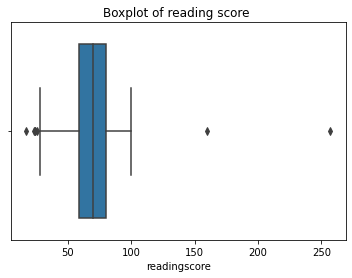

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["readingscore"])
plt.title("Boxplot of reading score ")

Text(0.5, 1.0, 'Boxplot of math score ')

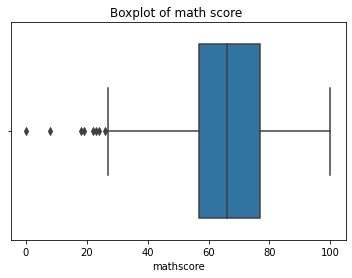

In [8]:

sns.boxplot(x=df["mathscore"])
plt.title("Boxplot of math score ")

Text(0.5, 1.0, 'Boxplot of writing score ')

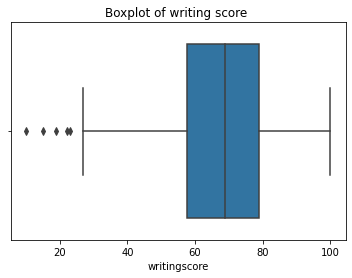

In [9]:

sns.boxplot(x=df["writingscore"])
plt.title("Boxplot of writing score ")

In [10]:
df.shape

(1000, 7)

IQR(Inter Quartile Range)

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

mathscore       20.00
readingscore    21.00
writingscore    21.25
dtype: float64


In [12]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
#lower limit
lower_limit

mathscore       27.000
readingscore    27.500
writingscore    25.875
dtype: float64

In [13]:
#upper limit
upper_limit

mathscore       107.000
readingscore    111.500
writingscore    110.875
dtype: float64

/tmp/ipykernel_4699/1388868627.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outlier = df_new[(df_new>lower_limit)&(df_new<upper_limit)]


Text(0.5, 1.0, 'Boxplot of writing score after removing outliers ')

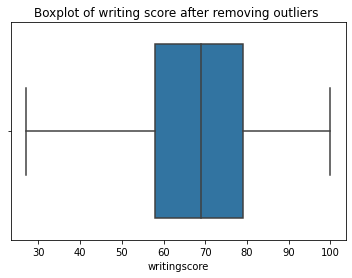

In [14]:
df_no_outlier = df_new[(df_new>lower_limit)&(df_new<upper_limit)]

sns.boxplot(x=df_no_outlier["writingscore"])
plt.title("Boxplot of writing score after removing outliers ")


Text(0.5, 1.0, 'Boxplot of reading score after removing outliers')

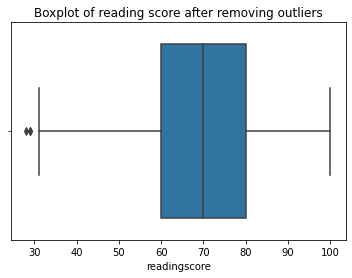

In [15]:

sns.boxplot(x=df_no_outlier["readingscore"])
plt.title("Boxplot of reading score after removing outliers")

Text(0.5, 1.0, 'Boxplot of math score after removing outliers')

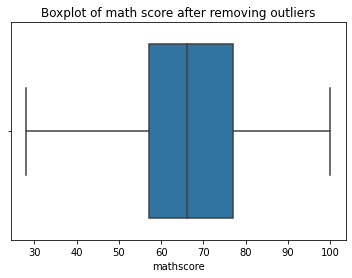

In [16]:

sns.boxplot(x=df_no_outlier["mathscore"])
plt.title("Boxplot of math score after removing outliers")

In [17]:
df_no_outlier.shape

(1000, 7)

In [18]:
df.skew()


/tmp/ipykernel_4699/547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


mathscore      -0.278592
readingscore    1.549734
writingscore   -0.289444
dtype: float64

<AxesSubplot:>

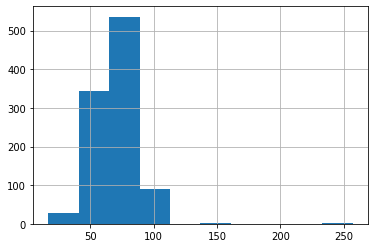

In [19]:
df['readingscore'].hist()


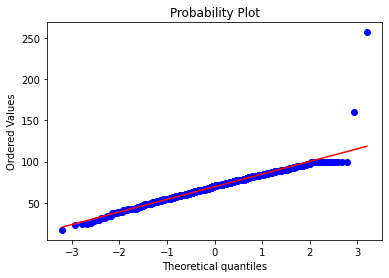

In [20]:
import scipy.stats as stat

stat.probplot(df['readingscore'],dist='norm',plot=plt)
plt.show()

log tranformation

<AxesSubplot:>

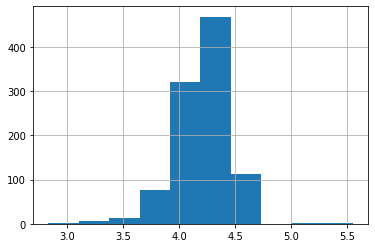

In [21]:
df["readingscore_log"]=np.log(df["readingscore"])
df['readingscore_log'].hist()



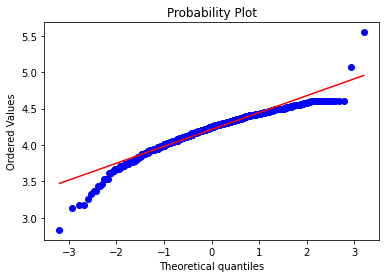

In [22]:

stat.probplot(df['readingscore_log'],dist='norm',plot=plt)
plt.show()

In [23]:
df['readingscore_log'].skew()

-0.8619730726789324

squre root transformation

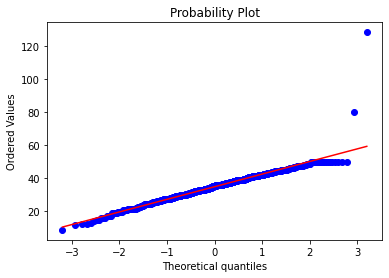

In [24]:
df["readingscore_log"]=df["readingscore"]**1/2

stat.probplot(df['readingscore_log'],dist='norm',plot=plt)
plt.show()

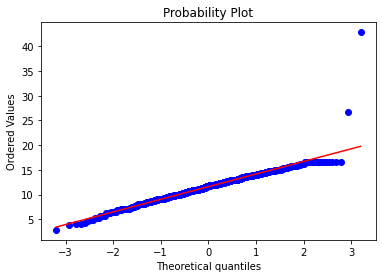

In [25]:
df["readingscore_log"]=df["readingscore"]**1/6

stat.probplot(df['readingscore_log'],dist='norm',plot=plt)
plt.show()

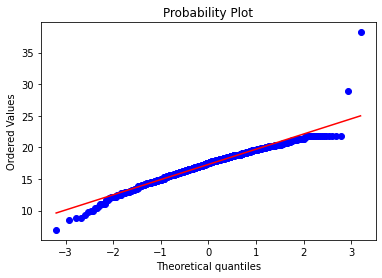

In [26]:
df["readingscore_log"],lamdavalue=stat.boxcox(df["readingscore"])

stat.probplot(df['readingscore_log'],dist='norm',plot=plt)
plt.show()

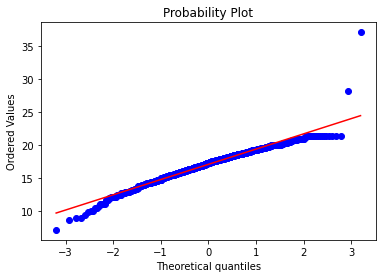

In [27]:
df["readingscore_log"],lambavalue=stat.yeojohnson(df["readingscore"])

stat.probplot(df['readingscore_log'],dist='norm',plot=plt)
plt.show()